In [31]:
import tensorflow as tf
from keras import datasets
from tensorflow.python.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# from sklearn.datasets import fetch_lfw_people

# # Load LFW dataset
# lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# # Split the dataset
# train_images, test_images, train_labels, test_labels = train_test_split(
#     lfw_people.images, lfw_people.target, test_size=0.25, random_state=42)

# # Reshape images to match the input shape of the model
# train_images = train_images[..., tf.newaxis]
# test_images = test_images[..., tf.newaxis]
# train_images = tf.image.resize(train_images, (32, 32))
# test_images = tf.image.resize(test_images, (32, 32))
# train_images = tf.image.grayscale_to_rgb(train_images)
# test_images = tf.image.grayscale_to_rgb(test_images)

In [12]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the labels
train_labels = train_labels.ravel()
test_labels = test_labels.ravel()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 164s 1us/step


In [15]:
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

In [16]:

# Load ResNet50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False

# Preprocess the images for ResNet50
train_images_resnet = preprocess_input(train_images)
test_images_resnet = preprocess_input(test_images)

# Extract features
train_features = base_model.predict(train_images_resnet)
test_features = base_model.predict(test_images_resnet)

# Flatten the features
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

2025-03-20 21:42:31.165627: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-03-20 21:42:31.216286: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vinoth/.local/lib/python3.10/site-packages/cv2/../../lib64:/home/vinoth/ros2_ws/install/my_cpp_library/lib:/home/vinoth/ros2_ws/install/diffdrive_arduino/lib:/home/vinoth/ros2_ws/install/custom_costmap_layer/lib:/opt/ros/humble/opt/zenoh_cpp_vendor/lib:/usr/lib/x86_64-linux-gnu/gazebo-11/plugins:/opt/ros/humble/opt/rviz_ogre_vendor/lib:/opt/ros/humble/lib/x86_64-linux-gnu:/opt/ros/humble/lib:/home/vinoth/.mujoco/mujoco210/bin:/usr/lib/nvidia
2025-03-20 21:42:31.216322: W tensorflow/core/common_runtime/g

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 48s 1us/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 71ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step


In [26]:
def plot_confusion_matrix(y_true, y_pred, class_names, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [17]:
# Train Logistic Regression
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(train_features_flat, train_labels)

# Predict and evaluate
lr_predictions = clf_lr.predict(test_features_flat)
lr_accuracy = accuracy_score(test_labels, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

Logistic Regression Accuracy: 0.4697


/home/vinoth/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Train Random Forest
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(train_features_flat, train_labels)

# Predict and evaluate
rf_predictions = clf_rf.predict(test_features_flat)
rf_accuracy = accuracy_score(test_labels, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.3879


In [21]:
# Train KNN
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(train_features_flat, train_labels)

# Predict and evaluate
knn_predictions = clf_knn.predict(test_features_flat)
knn_accuracy = accuracy_score(test_labels, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.3037


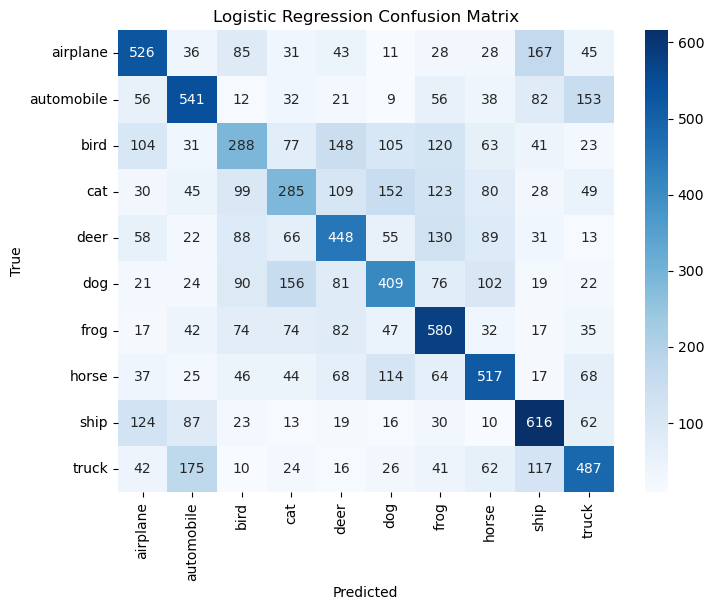

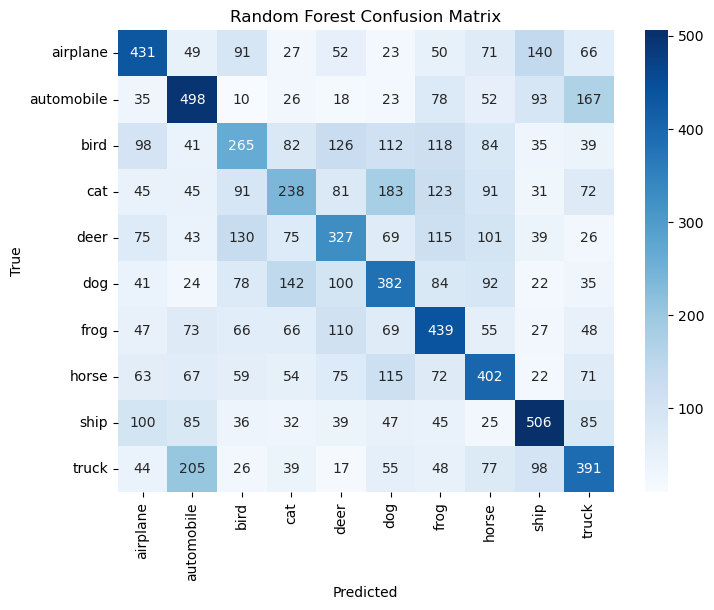

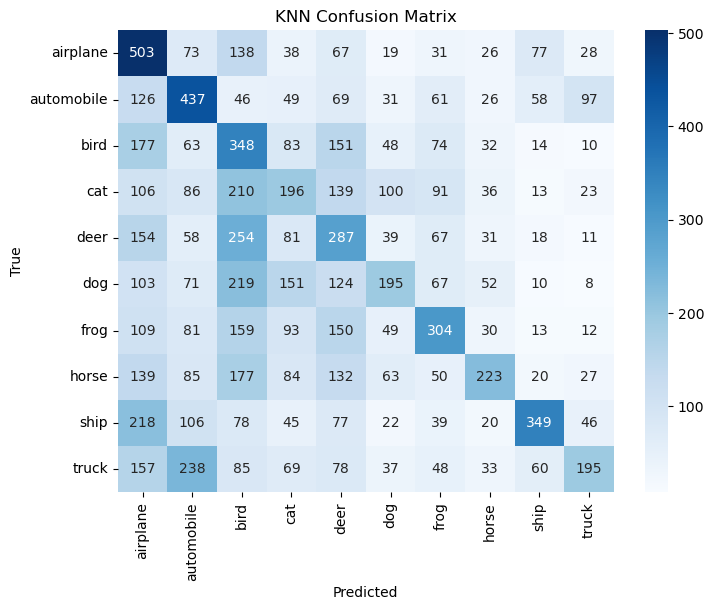

In [29]:
plot_confusion_matrix(test_labels, lr_predictions, class_names, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(test_labels, rf_predictions, class_names, "Random Forest Confusion Matrix")
plot_confusion_matrix(test_labels, knn_predictions, class_names, "KNN Confusion Matrix")

In [30]:
def print_classification_report(y_true, y_pred, model_name):
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred, target_names=class_names))

# Print classification reports for each model
print_classification_report(test_labels, lr_predictions, "Logistic Regression")
print_classification_report(test_labels, rf_predictions, "Random Forest")
print_classification_report(test_labels, knn_predictions, "KNN")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    airplane       0.52      0.53      0.52      1000
  automobile       0.53      0.54      0.53      1000
        bird       0.35      0.29      0.32      1000
         cat       0.36      0.28      0.32      1000
        deer       0.43      0.45      0.44      1000
         dog       0.43      0.41      0.42      1000
        frog       0.46      0.58      0.52      1000
       horse       0.51      0.52      0.51      1000
        ship       0.54      0.62      0.58      1000
       truck       0.51      0.49      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.47     10000
weighted avg       0.46      0.47      0.47     10000

Classification Report for Random Forest:
              precision    recall  f1-score   support

    airplane       0.44      0.43      0.44      1000
  automobile       0.44      0.50      0.47 

In [33]:
# Alternate method
def evaluate_classifier(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
    recall = recall_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
    f1 = f1_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class

    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-" * 40)

In [34]:
# Evaluate Logistic Regression
evaluate_classifier(test_labels, lr_predictions, "Logistic Regression")

# Evaluate Random Forest
evaluate_classifier(test_labels, rf_predictions, "Random Forest")

# Evaluate KNN
evaluate_classifier(test_labels, knn_predictions, "KNN")

Performance Metrics for Logistic Regression:
Accuracy: 0.4697
Precision: 0.4642
Recall: 0.4697
F1-Score: 0.4653
----------------------------------------
Performance Metrics for Random Forest:
Accuracy: 0.3879
Precision: 0.3845
Recall: 0.3879
F1-Score: 0.3851
----------------------------------------
Performance Metrics for KNN:
Accuracy: 0.3037
Precision: 0.3372
Recall: 0.3037
F1-Score: 0.3023
----------------------------------------
